In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

# Create analyzer - instantiate class

In [2]:
analyzer = LatticeData()

## Correlation Function and Correlation Length

NOTE: remember you can't do manual thermalization with G_ij - it's calculated in C++, not in post. 

In [3]:
params = analyzer.all_params()

In [4]:
params[(params["length"]==20) & (params["nMC"]>1000)]

,nMC,ntherm,itheta,beta,length
1,10000.0,0.0,1.570796,1.6,20.0
4,10000.0,0.0,0.392699,1.6,20.0
7,10000.0,0.0,0.785398,1.6,20.0
10,10000.0,0.0,0.000000,1.6,20.0
16,10000.0,0.0,3.141593,1.6,20.0
21,10000.0,0.0,2.356194,1.6,20.0


In [5]:
itheta = np.pi
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
corr_params = {"itheta": itheta, "beta": beta,"length": length,"nMC": nMC, "ntherm": ntherm}

In [6]:
G_ij = analyzer.get_corr_func(suppress_output = False,**corr_params)

nMC 10000
ntherm 0
itheta 3.141593
beta 1.6
length 20


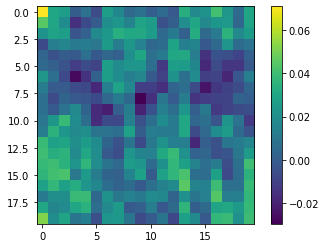

In [7]:
plt.imshow(G_ij, cmap = "viridis", aspect='equal')
plt.colorbar()
plt.show()

In [8]:
itheta = 1.0*np.pi
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
corr_params = {"itheta": itheta, "beta": beta,"length": length,"nMC": nMC, "ntherm": ntherm}
G_pi = analyzer.get_corr_func(**corr_params)

nMC 10000
ntherm 0
itheta 3.141593
beta 1.6
length 20


In [9]:
itheta = 0.5*np.pi
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
corr_params = {"itheta": itheta, "beta": beta,"length": length,"nMC": nMC, "ntherm": ntherm}
G_pi2 = analyzer.get_corr_func(**corr_params)

nMC 10000
ntherm 0
itheta 1.570796
beta 1.6
length 20


In [10]:
itheta = 0.25*np.pi
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
corr_params = {"itheta": itheta, "beta": beta,"length": length,"nMC": nMC, "ntherm": ntherm}
G_pi4 = analyzer.get_corr_func(**corr_params)

nMC 10000
ntherm 0
itheta 0.785398
beta 1.6
length 20


In [11]:
itheta = 0.75*np.pi
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
corr_params = {"itheta": itheta, "beta": beta,"length": length,"nMC": nMC, "ntherm": ntherm}
G_3pi4 = analyzer.get_corr_func(**corr_params)

nMC 10000
ntherm 0
itheta 2.356194
beta 1.6
length 20


In [12]:
itheta = 0.0
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
corr_params = {"itheta": itheta, "beta": beta,"length": length,"nMC": nMC, "ntherm": ntherm}
G_0 = analyzer.get_corr_func(**corr_params)

nMC 10000
ntherm 0
itheta 0.0
beta 1.6
length 20


In [13]:
itheta = 0.125*np.pi
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
corr_params = {"itheta": itheta, "beta": beta,"length": length,"nMC": nMC, "ntherm": ntherm}
G_pi8 = analyzer.get_corr_func(**corr_params)

nMC 10000
ntherm 0
itheta 0.392699
beta 1.6
length 20


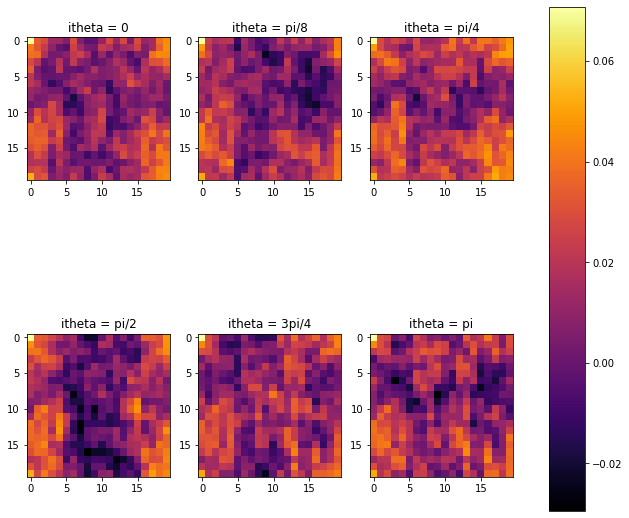

In [14]:
Gs = [G_0,G_pi8,G_pi4,G_pi2,G_3pi4,G_pi]
titles = ["itheta = 0","itheta = pi/8","itheta = pi/4","itheta = pi/2", "itheta = 3pi/4","itheta = pi"]
Gmin = np.min(Gs)
Gmax = np.max(Gs)
fig, axs = plt.subplots(2,int(len(Gs)/2), figsize = (10,10))
for n, ax in enumerate(axs.flat):
    im = ax.imshow(Gs[n],vmin = Gmin, vmax = Gmax, cmap = 'inferno')
    ax.set_title(titles[n])
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.subplots_adjust(right=0.8)
fig.colorbar(im, cax=cbar_ax)
plt.show()

In [15]:
itheta = 0.0
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
corr_params = {"itheta": itheta, "beta": beta,"length": length,"nMC": nMC, "ntherm": ntherm}
F = analyzer.calc_F(**corr_params)

nMC 10000
ntherm 0
itheta 0.392699
beta 1.6
length 20
L = 20


In [16]:
F

(1.2130326875509114-0.5562811519838846j)

In [ ]:
corr_data = analyzer.do_stats(filtered = True, **corr_params)

In [ ]:
corr_data.head()

## Basic statistics

In [ ]:
df = analyzer.get_data()

In [ ]:
df.head()

In [ ]:
df["itheta"].unique()

In [ ]:
df_stats = analyzer.do_stats(therm = 0.2)

In [ ]:
df_stats

# Observable plots

In [ ]:
df_stats = analyzer.do_stats(therm = 0.4,filtered = True, **plot_params)

In [ ]:
df_stats.columns

In [ ]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Q_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

In [ ]:
plot_data = df_systematics
plot_data.head()

In [ ]:
plot_data["Q_L/L^2"] = plot_data["Q_L"]/(plot_data["length"]**2)

In [ ]:
plot_data = plot_data[plot_data["step"]>2000]

In [ ]:
sns.pointplot(data = plot_data, x = "itheta", y = plot_data["Q_L"], hue = "length", 
              errorbar="se", linestyles = "None", palette = analyzer.palette)
plt.show()